In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
data=pd.read_excel('http://taanila.fi/CO2.xlsx')
data.index = pd.to_datetime(data['Kuukausi'],format="%Y-%m")
data=data.drop('Kuukausi',axis=1)
data.head(12)

,CO2
Kuukausi,
1999-12-01,368.04
2000-01-01,369.25
2000-02-01,369.50
2000-03-01,370.56
2000-04-01,371.82
2000-05-01,371.51
2000-06-01,371.71
2000-07-01,369.85
2000-08-01,368.20


In [3]:
data.shape

(237, 1)

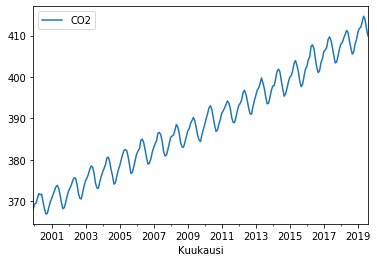

In [4]:
data.plot()

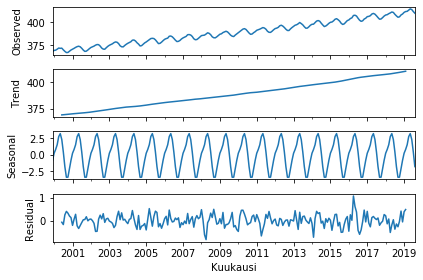

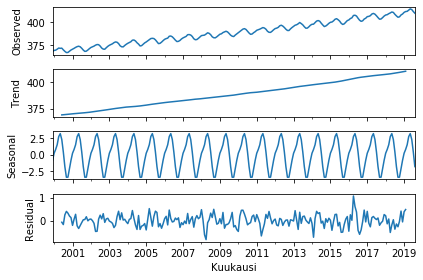

In [5]:
from statsmodels.tsa.api import seasonal_decompose

seasonal_decompose(data['CO2']).plot()

In [6]:
fit1 = ExponentialSmoothing(data['CO2'], seasonal_periods=2 , 
                            trend='add', seasonal='mul').fit()

C:\Users\mehto\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


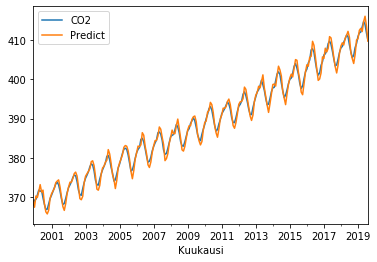

In [7]:
data['Predict']=fit1.fittedvalues
data.plot()

In [8]:
sqrt(mean_squared_error(data['CO2'], data['Predict']))

1.062015328470114

In [9]:
mean_absolute_error(data['CO2'], data['Predict'])

0.8759091326781444

In [10]:
index=pd.date_range('2006-06-30', periods=4, freq='Q')

In [11]:
data['Predict']=fit1.fittedvalues
data

,CO2,Predict
Kuukausi,,
1999-12-01,368.04,369.325637
2000-01-01,369.25,367.473686
2000-02-01,369.50,370.323185
2000-03-01,370.56,369.926174
2000-04-01,371.82,371.385869
2000-05-01,371.51,373.215877
2000-06-01,371.71,371.307174
2000-07-01,369.85,371.825732
2000-08-01,368.20,368.360013


In [12]:
data['Error'] = fit1.resid
data

,CO2,Predict,Error
Kuukausi,,,
1999-12-01,368.04,369.325637,-1.285637
2000-01-01,369.25,367.473686,1.776314
2000-02-01,369.50,370.323185,-0.823185
2000-03-01,370.56,369.926174,0.633826
2000-04-01,371.82,371.385869,0.434131
2000-05-01,371.51,373.215877,-1.705877
2000-06-01,371.71,371.307174,0.402826
2000-07-01,369.85,371.825732,-1.975732
2000-08-01,368.20,368.360013,-0.160013


Text(0, 0.5, 'Realized CO2')

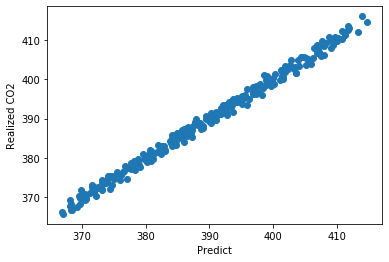

In [13]:
plt.scatter(x = data['CO2'], y = data['Predict'])
plt.xlabel('Predict')
plt.ylabel('Realized CO2')

In [23]:
index = pd.data_range('2019-09-01', periods = 4, freq = 'Q')
predictions = fit1.forecast(12)
data_prediction = data.DataFrame(data = predictions, index = index, columns = ['Predict'])
data_prediction

AttributeError: module 'pandas' has no attribute 'data_range'

NameError: name 'data_prediction' is not defined

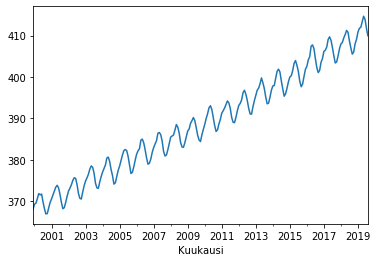

In [24]:
data['CO2'].plot()
data_prediction['Predict'].plot()